In [1]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
fake=pd.read_csv('../data/Fake.csv')
real=pd.read_csv('../data/True.csv')

In [6]:
fake['label']='fake'
real['label']='real'

df = pd.concat([fake, real]).sample(frac=1).reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [8]:
import re
import spacy
from nltk.corpus import stopwords
import string

In [9]:
# Load spacy model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords using nltk
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatization using spacy
    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc])
    return text


In [10]:
df_sample = df.head(2000)

df_sample['processed_title'] = df_sample['title'].apply(preprocess_text)
df_sample['processed_text'] = df_sample['text'].apply(preprocess_text)
df_sample['processed_subject'] = df_sample['subject'].apply(preprocess_text)
df_sample['processed_date'] = df_sample['date'].astype(str).apply(preprocess_text)

processed_sample_df = df_sample[['processed_title', 'processed_text', 'processed_subject', 'processed_date', 'label']]

processed_sample_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_30528\2982048536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['processed_title'] = df_sample['title'].apply(preprocess_text)
C:\Users\HP\AppData\Local\Temp\ipykernel_30528\2982048536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['processed_text'] = df_sample['text'].apply(preprocess_text)
C:\Users\HP\AppData\Local\Temp\ipykernel_30528\2982048536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,processed_title,processed_text,processed_subject,processed_date,label
0,trump may kill vile conservative antiwoman cru...,support donald trump senile move farback conse...,news,april,fake
1,we directly communicate north korea seek dialogue,beijing reuters united states say saturday dir...,worldnew,september,real
2,fume trump call colorado loss big story politi...,republican frontrunner donald trump lose grace...,news,april,fake
3,us sanction north koreans flagrant right abuse,washington reuters united states thursday impo...,worldnew,october,real
4,federer survive tiafoe scare advance,new york reuters world number three roger fede...,politicsnew,august,real


In [11]:
from nltk.tokenize import word_tokenize

# Tokenize processed columns in the sample dataframe
processed_sample_df['tokens_title'] = processed_sample_df['processed_title'].apply(word_tokenize)
processed_sample_df['tokens_text'] = processed_sample_df['processed_text'].apply(word_tokenize)
processed_sample_df['tokens_subject'] = processed_sample_df['processed_subject'].apply(word_tokenize)
processed_sample_df['tokens_date'] = processed_sample_df['processed_date'].apply(word_tokenize)

# Display tokenized sample
processed_sample_df[['tokens_title', 'tokens_text', 'tokens_subject', 'tokens_date', 'label']].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_30528\339991528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_sample_df['tokens_title'] = processed_sample_df['processed_title'].apply(word_tokenize)
C:\Users\HP\AppData\Local\Temp\ipykernel_30528\339991528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_sample_df['tokens_text'] = processed_sample_df['processed_text'].apply(word_tokenize)
C:\Users\HP\AppData\Local\Temp\ipykernel_30528\339991528.py:6: SettingWithCopyWarning: 
A value is t

,tokens_title,tokens_text,tokens_subject,tokens_date,label
0,"[trump, may, kill, vile, conservative, antiwom...","[support, donald, trump, senile, move, farback...",[news],[april],fake
1,"[we, directly, communicate, north, korea, seek...","[beijing, reuters, united, states, say, saturd...",[worldnew],[september],real
2,"[fume, trump, call, colorado, loss, big, story...","[republican, frontrunner, donald, trump, lose,...",[news],[april],fake
3,"[us, sanction, north, koreans, flagrant, right...","[washington, reuters, united, states, thursday...",[worldnew],[october],real
4,"[federer, survive, tiafoe, scare, advance]","[new, york, reuters, world, number, three, rog...",[politicsnew],[august],real


In [12]:
import pickle

# Join tokens back to string for vectorization
processed_sample_df['text_for_vectorizer'] = processed_sample_df['tokens_text'].apply(lambda tokens: ' '.join(tokens))

# Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_sample_df['text_for_vectorizer'])
y = processed_sample_df['label'].map({'fake': 0, 'real': 1})  # Encode labels

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# Save vectorizer and model to disk
with open('../model/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('../model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Evaluate model
score = model.score(X_test, y_test)
print(f"Test Accuracy: {score:.4f}")

Test Accuracy: 0.9650


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

MSE: 0.0350
R2 Score: 0.8598
F1 Score: 0.9663


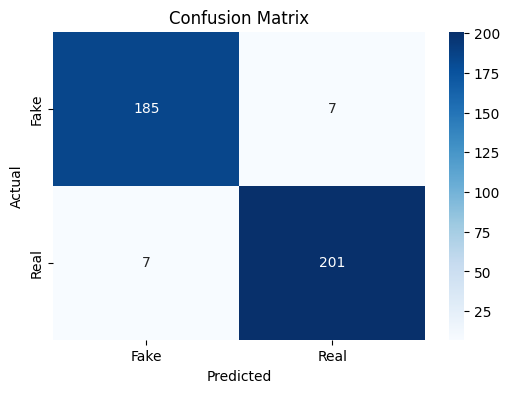

In [14]:
import seaborn as sns

# Generate and display the confusion matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()